In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
%matplotlib inline

In [ ]:
# В качестве обучающей выборки необходимо сгенерировать 20000 точек случайным образом.
n = 20000
shape = (n,2,)
x = torch.rand(shape)
x = x * 20.0 - 10.0

y = torch.sin(x[:,0] + 2*x[:,1])*torch.exp(-(2*x[:,0] + x[:,1])**2)

In [ ]:
y.unsqueeze_(1)
y

tensor([[-6.4493e-04],
        [ 4.7463e-02],
        [ 0.0000e+00],
        ...,
        [ 5.9317e-05],
        [-0.0000e+00],
        [-0.0000e+00]])

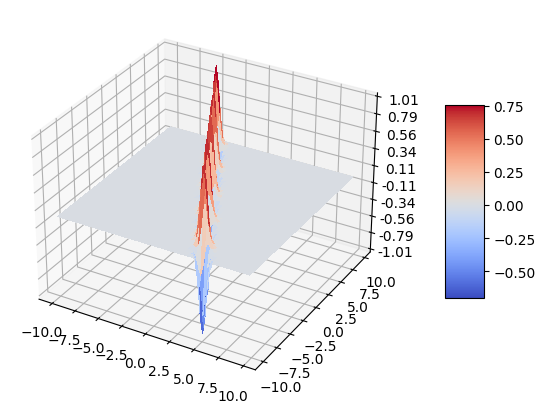

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + 2*Y)*np.exp(-(2*X + Y)**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Разделить получившийся датасет на train / test / val в отношениях 70% / 15% / 15%, соответственно.
n_train = int(n*0.7)
n_test = int(n*0.15)
n_valid = int(n*0.15)
n_train, n_test, n_valid

(14000, 3000, 3000)

In [ ]:
x_train = x[0:n_train]
y_train = y[0:n_train]

x_test = x[n_test: n_test + n_test]
y_test = y[n_test: n_test + n_test]

x_valid = x[n_test + n_test:n_test + n_test + n_valid]
y_valid = y[n_test + n_test:n_test + n_test + n_valid]

len(x_train), len(x_test), len(x_valid)

(14000, 3000, 3000)

In [ ]:
# Модель
class SineExpNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineExpNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_exp_net = SineExpNet(5)

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)
    return y_pred


y_pred = predict(sine_exp_net, x_valid, y_valid)
mse = torch.nn.MSELoss()
output = mse(y_valid, y_pred)
print("MSE loss:", output)

MSE loss: tensor(1.3938, grad_fn=<MseLossBackward0>)


In [ ]:
optimizer = torch.optim.Adam(sine_exp_net.parameters(), lr=0.01)

loss = torch.nn.MSELoss()

for epoch_index in range(2000):
    if epoch_index%100 == 0:
      print('Epoch={}'.format(epoch_index))
    optimizer.zero_grad()

    y_pred = sine_exp_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

y_pred = predict(sine_exp_net, x_valid, y_valid)

output = mse(y_valid, y_pred)
print("MsE loss:", output)

Epoch=0
Epoch=100
Epoch=200
Epoch=300
Epoch=400
Epoch=500
Epoch=600
Epoch=700
Epoch=800
Epoch=900
Epoch=1000
Epoch=1100
Epoch=1200
Epoch=1300
Epoch=1400
Epoch=1500
Epoch=1600
Epoch=1700
Epoch=1800
Epoch=1900
MsE loss: tensor(0.0139, grad_fn=<MseLossBackward0>)


In [ ]:
# Посчитать метрику Mean Square Error(MSE) на test.
y_pred = predict(sine_exp_net, x_test, y_test)

output = mse(y_test, y_pred)
print("MsE loss:", output)

MsE loss: tensor(0.0171, grad_fn=<MseLossBackward0>)


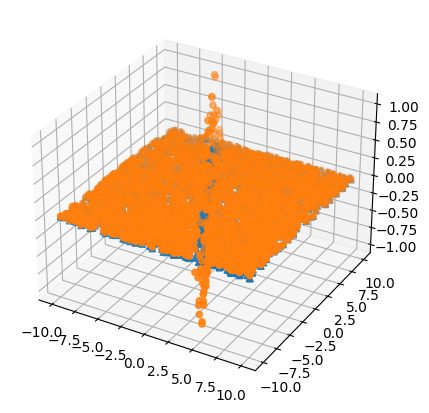

In [ ]:
# Нарисовать график, в котором сравнивается истинная функция и ее аппроксимированный вариант (предсказываемый моделью)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_np = x_test.numpy()
y_np_pred = y_pred.detach().numpy()
y_np = y_test.detach().numpy()

xs = x_np[:,0]
ys = x_np[:,1]
zs_pred = y_np_pred.squeeze()
zs = y_np.squeeze()

ax.scatter(xs, ys, zs_pred, marker='^')
ax.scatter(xs, ys, zs, marker='o')



In [ ]:
x_np[:,0]

array([ 0.5961132,  2.4438953,  7.157654 , ...,  1.0899563,  5.952674 ,
       -3.8533735], dtype=float32)